## Data analysis and tranforming

#### first take dataset and plot graph between date and total cases to get an idea.

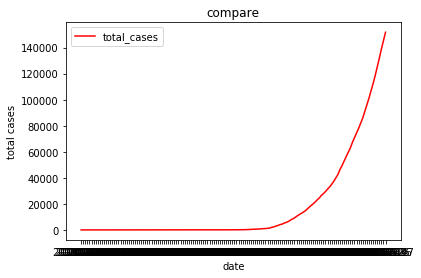

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv("covid_india.csv")
y = data1.total_cases
x = data1.date

plt.plot(x, y, color='r') 
plt.xlabel('date')
plt.ylabel('total cases')
plt.title('compare')
plt.legend() 
plt.show()

##### Remove unnecessary columns from datasets and clean it 


In [25]:
df_final = pd.read_csv("covid_india.csv",na_values=['null'],parse_dates=True,infer_datetime_format=True)
df_final.drop(['total_cases','total_deaths','new_deaths','total_cases_per_million','total_tests','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_100k','new_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_units','stringency_index','population_density','median_age'], axis = 1,inplace=True)
df_final.to_csv('covid_india2.csv',index = False)
df_final.tail()

,iso_code,date,new_cases,population
143,IND,2020-05-23,6654,1.380004e+09
144,IND,2020-05-24,6767,1.380004e+09
145,IND,2020-05-25,6977,1.380004e+09
146,IND,2020-05-26,6535,1.380004e+09
147,IND,2020-05-27,6387,1.380004e+09


In [26]:
df_final.describe() ##df_final.shape

,new_cases,population
count,148.000000,1.480000e+02
mean,1025.452703,1.380004e+09
std,1779.643702,0.000000e+00
min,0.000000,1.380004e+09
25%,0.000000,1.380004e+09
50%,11.000000,1.380004e+09
75%,1347.250000,1.380004e+09
max,6977.000000,1.380004e+09


In [27]:
###Check for null data
df_final.isnull().values.any()

False

##### Convert date of yyyy-mm-dd to yyyymmdd

In [28]:

df_final['date']=pd.to_datetime(df_final['date'])
# test['Date']=test['Date'].dt.strftime("%Y%m%d")
df_final['date']=df_final['date'].dt.strftime("%Y%m%d").astype(int)
df_final.index.name = 'Id'
df_final.head()

,iso_code,date,new_cases,population
Id,,,,
0,IND,20191231,0,1.380004e+09
1,IND,20200101,0,1.380004e+09
2,IND,20200102,0,1.380004e+09
3,IND,20200103,0,1.380004e+09
4,IND,20200104,0,1.380004e+09


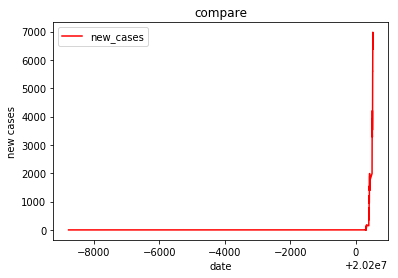

In [29]:
y = df_final.new_cases
x = df_final.date

plt.plot(x, y, color='r') 
plt.xlabel('date')
plt.ylabel('new cases')
plt.title('compare')
plt.legend() 
plt.show()

##### Label encode the  'IND'  column and define features and target


In [49]:
x=df_final.iloc[:,[0,1]].values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x[:,0]=labelencoder.fit_transform(x[:,0])
x

array([[0, 20191231],
       [0, 20200101],
       [0, 20200102],
       [0, 20200103],
       [0, 20200104],
       [0, 20200105],
       [0, 20200106],
       [0, 20200107],
       [0, 20200108],
       [0, 20200109],
       [0, 20200110],
       [0, 20200111],
       [0, 20200112],
       [0, 20200113],
       [0, 20200114],
       [0, 20200115],
       [0, 20200116],
       [0, 20200117],
       [0, 20200118],
       [0, 20200119],
       [0, 20200120],
       [0, 20200121],
       [0, 20200122],
       [0, 20200123],
       [0, 20200124],
       [0, 20200125],
       [0, 20200126],
       [0, 20200127],
       [0, 20200128],
       [0, 20200129],
       [0, 20200130],
       [0, 20200131],
       [0, 20200201],
       [0, 20200202],
       [0, 20200203],
       [0, 20200204],
       [0, 20200205],
       [0, 20200206],
       [0, 20200207],
       [0, 20200208],
       [0, 20200209],
       [0, 20200210],
       [0, 20200211],
       [0, 20200212],
       [0, 20200213],
       [0,

In [50]:
y=df_final.iloc[:,[2]].values
y[107]

array([1007], dtype=int64)

##### Split dataset into train & test 

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15)


### Use RANDOM FOREST Regressor to  predict with x_test

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.metrics import r2_score
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_predicted2=rfr.predict(x_test)


r2_score(y_test,y_predicted2)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9718242775277602

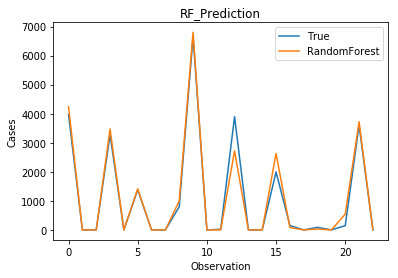

In [64]:
plt.plot(y_test, label='True')
plt.plot(y_predicted2, label='RandomForest')
plt.title("RF_Prediction")
plt.xlabel('Observation')
plt.ylabel('Cases')
plt.legend()
plt.show()


In [66]:
#create new dataframe with only the column Close
import math
data1 = df_final.filter(['new_cases'])
#into numpy array
print(len(y_train))
dataset = data1.values
train_data_len=math.ceil(len(dataset)-23)
train_data_len

125


125

In [67]:
valid=df_final[train_data_len:]
train=df_final[:train_data_len]
valid['Prediction']=y_predicted2

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### When we try to make prediction and compare with actual value then it doesn't work well. . . 

##### Just because we are only predicting new cases only with feature date (Day) 

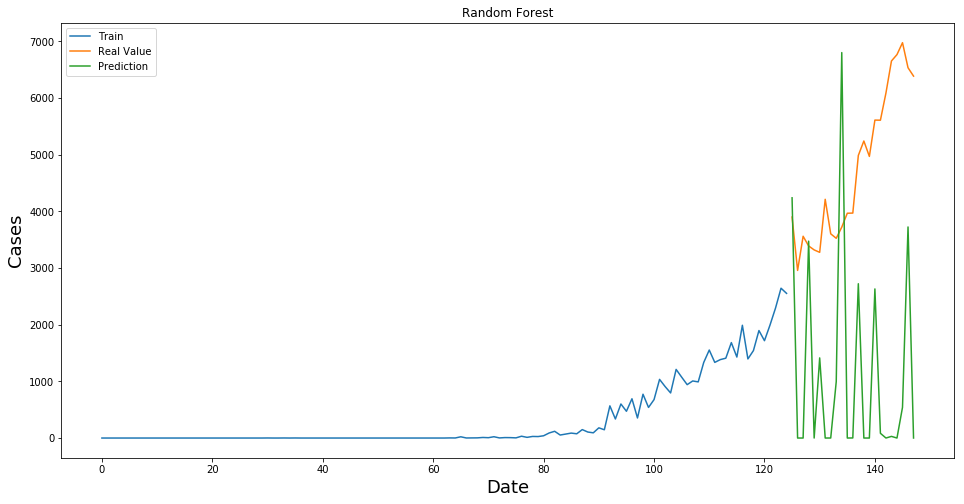

In [68]:
plt.figure(figsize=(16,8))
plt.title('Random Forest')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Cases',fontsize=18)
plt.plot(train['new_cases'])
plt.plot(valid[['new_cases','Prediction']])
plt.legend(['Train','Real Value','Prediction'],loc='upper left')
plt.show()

### Use DECISION TREE Regressor to  predict with x_test

In [69]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
clf = DecisionTreeRegressor()
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
y_predicted_clf=clf.predict(x_test)

valid=df_final[train_data_len:]
train=df_final[:train_data_len]
valid['Prediction']=y_predicted_clf

r2_score(y_test,y_predicted_clf)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0.969879949817817

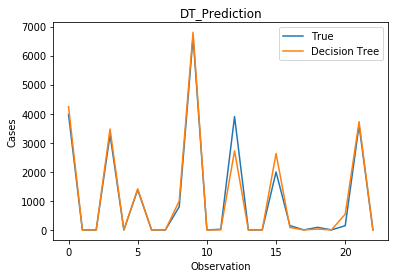

In [70]:
plt.plot(y_test, label='True')
plt.plot(y_predicted2, label='Decision Tree')
plt.title("DT_Prediction")
plt.xlabel('Observation')
plt.ylabel('Cases')
plt.legend()
plt.show()


#### When we try to make prediction and compare with actual value then it doesn't work well. . . 

##### Just because we are only predicting new cases only with feature date (Day) 

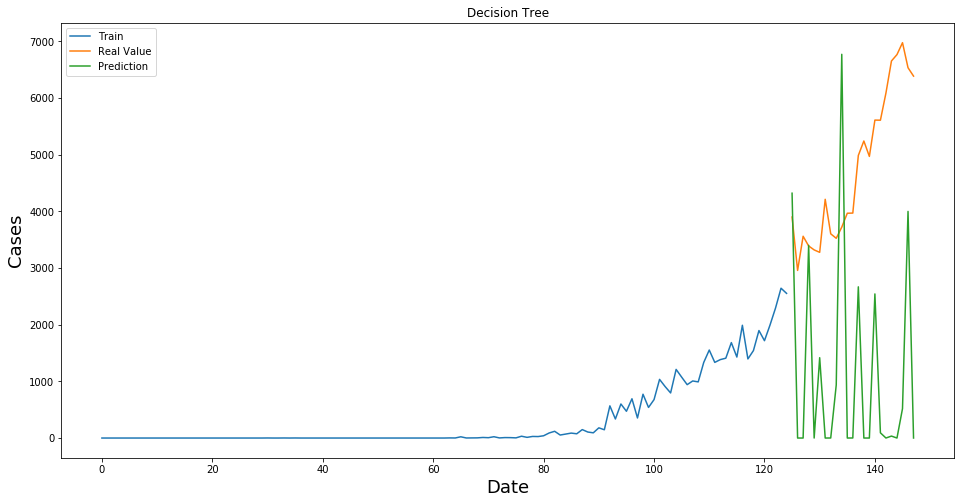

In [71]:
plt.figure(figsize=(16,8))
plt.title('Decision Tree')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Cases',fontsize=18)
plt.plot(train['new_cases'])
plt.plot(valid[['new_cases','Prediction']])
plt.legend(['Train','Real Value','Prediction'],loc='upper left')
plt.show()